# Assignment 4: Mid Point Review

In [70]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import matplotlib
import matplotlib.pyplot as plt

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


#### Linear Regression
Assume the some data is modelled after a linear function plus some gaussian noise. We wish to find parameters $a_1, a_2, \cdots, a_n, b$ such that
the function $$ \hat y = f(x_1, \cdots, x_n) = a_1 x_1 + \cdots + a_n x_n + b $$
most closely fits the observed value $ y $.
Define the loss as $$L(y, \hat y) = \sum_{i=1}^n (y - \hat y)^2$$
That is we wish to find
$$ \operatorname*{argmin}_{a_1, \cdots, a_n, b} L(y, \hat y) $$
And we can rewrite the problem as trying to find $w$ such that $\hat y = w^T x$ minimizes the loss.
If the dimensions of $X$ are small enough, we can use the closed form solution $$ \hat w = (X^T X)^{-1} X^T y,$$ otherwise we can do gradient descent on the loss defined above.

#### Polynomial Regression
Given some input data $X$, we can add new features in the form of powers of components of $X$ in order to have an some expanded data $X'$.
We then perform linear regression on $X'$.

#### Overfitting
Overfitting is the phenomenon where some model fits the training data so well that it fails to generalize.
In effect, the model is almost perfectly able to predict all the data is has seen, but fails to correctly predict data it has never seen before.
It usually happens where there are too many parameters in the model.

#### Underfiting
Underfitting is the phenomenon where some model is unable to learn the training data.
This is usually due to the fact that the model is not complex enough to capture the patterns in the data.
It usually happens where there are not enough parameters in the model.

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

#### Logistic Regression
We apply logistic regression when the input data is continuous but the output data is discrete.
We define a log-odds function which is linear in $X$, the input data.
Then, we define a function (maximum likelihood) which is multiplicative in the probabilities, so that taking the logarithm results in a loss function which is a summation (logistic loss).
Then, doing we apply gradient descent on the logistic loss to train the classifier.

#### Linear SVM
Given a set of training dataset $D$ of the form $(x_1, y_1), \cdots, (x_n, y_n)$ where $x_i \in \mathbb R^n, y \in \{0, 1\}$, we wish to learn a way to classify points in $\mathbb R^n$.
If the data is linearly separable, we wish the find the best hyperplane which separates the two classes in $\mathbb R^n$.
Geometrically speaking, this hyperplane is completely determined by the points in $D$ which lie closest to it.
These are called the support vectors.
The margin is the subset of $\mathbb R^n$ which is between the two parallel hyperplanes which seperate the two classes.
If a dataset is not linearly separable, we add a slack variable to relax the contraints of the problem in order to find the best hyperplane which satisfies our relaxed contraints.
Another way to deal with dataset which are not linearly separable is to expand the data in a way similar to polynomial regression.
That is, we transform the dataset into a potentially higher dimensional space in which the data is linearly separable.

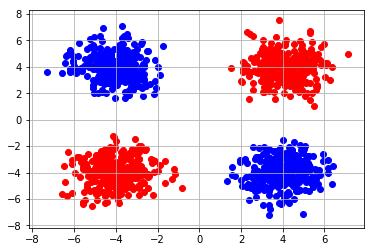

In [71]:
n = 300
l = 4.0
x_red = np.concatenate((np.random.normal(loc=-l,size=n), np.random.normal(loc=l,size=n)), axis=None)
y_red = np.concatenate((np.random.normal(loc=-l,size=n), np.random.normal(loc=l,size=n)), axis=None)
x_blue = np.concatenate((np.random.normal(loc=l,size=n), np.random.normal(loc=-l,size=n)), axis=None)
y_blue = np.concatenate((np.random.normal(loc=-l,size=n), np.random.normal(loc=l,size=n)), axis=None)


fig, ax = plt.subplots()
ax.scatter(x_red, y_red, c='r')
ax.scatter(x_blue, y_blue, c='b')

ax.grid()

plt.show()

The kernel $$ \phi\left(\begin{pmatrix} x \\ y \end{pmatrix} \right) = \begin{pmatrix} x \\ y \\ x \cdot y \end{pmatrix} $$ does the job.

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular supervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

#### Supervised vs Unsupervised Learning
Supervised learning is the problem where we wish to approximate a function $ f: A \to B $ given a subset of $ A \times B $ of the form $ D = \{ (x_1, y_1), \cdots, (x_n, y_n) \}. $
Unsupervised learning is the problem where we wish to find patterns within a set $ Y = \{y_1, \cdots, y_n\} \subseteq B $, e.g. by finding lower dimensional representation of points in $ Y $.

#### Lazy learning algorithm
A lazy learning algorithm is one that roughly speaking does not have a 'training' phase, it only solves the machine learning problem when given a query.
The K-NN algorithm is lazy, since it simply decides the output of a classification by computing the plurality class of the $ k $ nearest points in $ Y $.

#### The K-NN Algorithm
The K-NN algorithm is as follows
```
K-NN(data, target, x, k)
    Find the k closest points in data to x
    Output the mode class of those points
```

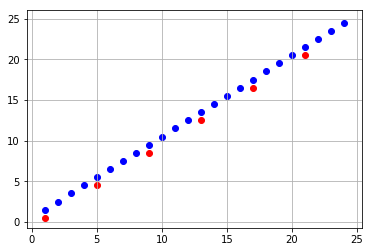

In [72]:
# The following dataset works in a Linear SVM classification but not a k-NN classification
n = 25
x_blue = np.arange(1, n)
y_blue = np.arange(1, n) + 0.5

x_red = np.arange(1, n, 4)
y_red = np.arange(1, n, 4) - 0.5

fig, ax = plt.subplots()
ax.scatter(x_red, y_red, c='r')
ax.scatter(x_blue, y_blue, c='b')

ax.grid()

plt.show()

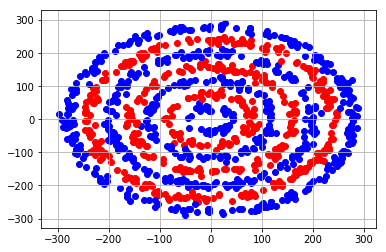

In [73]:
# the following dataset works in a k-NN classification but not an Linear SVM classification
m = 20
l = 40
fig, ax = plt.subplots()


for i in range(8):
    n = m * i
    a = np.random.uniform(low=0, high=2 * np.pi, size=2 * n)
    r = np.random.normal(loc=i*l,scale=l/6,size=2 * n)
    x = np.multiply(r, np.cos(a))
    y = np.multiply(r, np.sin(a))
    ax.scatter(x, y, c=('b'if i % 2 else 'r'))

ax.grid()

plt.show()

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

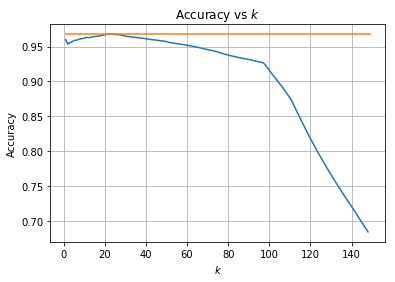

Best Accuracy: 0.9676190476190476, Best k: 21


In [74]:
# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data = iris['data']
target = iris['target']

def KNN(data, target, x, k):
    return stats.mode(np.take(target,np.argpartition(
            np.linalg.norm(data - x, axis=1), k)[:k]))[0][0]

tot, correct = 0, 0
best_acc, best_k = float('-inf'), None
acc = []
for k in range(1, len(data)-1):
    for i, (x, y) in enumerate(zip(data, target)):
        y_ = KNN(np.delete(data, i, axis=0), np.delete(target, i), x, k)
        tot, correct = (tot + 1, correct + (y == y_))
    cur_acc = correct/tot
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_k = k
    acc.append(cur_acc)

fig, ax = plt.subplots()
ax.plot(np.arange(1, len(data)-1), acc)
ax.plot([1, len(data)-1], [best_acc, best_acc])

ax.set(xlabel='$k$', ylabel='Accuracy',
       title='Accuracy vs $k$')
ax.grid()

plt.show()

print("Best Accuracy: {}, Best k: {}".format(best_acc, best_k))

### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

#### Bagging vs Boosting
Bagging is a technique we train many different models on randomnly selected subsets of the data and then combine the predictions of all these models to obtain a final prediction. Boosting is a technique where we have a set of "weak" learners and we combine them to create a strong learner. We would use baggin when We are using an unstable machine learning algorithm (i.e. a small change in the dataset may cause large changes in the learned model) and we wish to avoid overfitting. We use boosting if we already have "weak" learners and wish to combine them for form a "strong" learner.
#### Decision Trees and Random Forests
A decision tree is a machine learning model which attempts to find the best questions at each node of the tree in order to classify a given input.
A random forest is a collection of decision trees each trained on a subset of the features, where the output of the forest is the mode of the outputs of the decision trees.
Training a single decision tree is faster and inference is also fast.
Furthermore, the prediction of a decision tree is simpler to understand compared to other models.
However, decision trees are unstable.
The problem of finding the best decision tree is computationally expensive so we often use heuristics such as a greedy algorithm to find a "good enough" decision tree.
They often don't perform well in many tasks.
On the other hand, random forests tend to perform better than a single decision tree.
They are more stable since they take the mode of a lot of smaller decision trees.
The training and inference can be done in parallel.
On the other hand, if it is not possible to train or infer in parallel, random forests need to query each tree one by one.
It is harder to understand the decision of a random forest.

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

#### PCA and Dimensionality Reduction
The goal of PCA is to find a much smaller number of features which preserve as much "information" about the original data as possible.
We first center the examples by subtracting the mean.
Then we compute the covariance matrix of the centered data.
Then, we compute the matrix W, whose columns are the eigenvectors of the covariance matrix and pick the most relevant components.

#### Eigenvectors and Eigenvalues
The eigenvectors are going to form the basis of the lower dimensional space representation of the data.

#### Subtracting the Mean
Subtracting the mean simplifies the equation of the covariance matrix.

#### Autoencoders vs PCA
An autoencoders is a neural network that learn features that can be used for future tasks.
They achieve this by using a "bottleneck" shape.
They are generally better than PCA because they are able to learn non-linear compression.

#### Equivalence
If the autoencoder uses linear activation functions, the vector space it learns is the same as the one found by PCA.
However, the basis vectors are not the same. Indeed, unlike PCA, autoencoders are not contrained to find an orthonomal basis.

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [75]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


Iteration 1, loss = 16.29029962
Iteration 2, loss = 15.78219464
Iteration 3, loss = 15.26622208
Iteration 4, loss = 14.74700174
Iteration 5, loss = 14.28826960
Iteration 6, loss = 13.81959134
Iteration 7, loss = 13.40193601
Iteration 8, loss = 12.98716133
Iteration 9, loss = 12.51109175
Iteration 10, loss = 12.08154000
Iteration 11, loss = 11.94100750
Iteration 12, loss = 11.65955092
Iteration 13, loss = 11.28560750
Iteration 14, loss = 10.90341493
Iteration 15, loss = 10.63341371
Iteration 16, loss = 10.26452590
Iteration 17, loss = 9.90003354
Iteration 18, loss = 9.63238302
Iteration 19, loss = 9.38456978
Iteration 20, loss = 9.10069041
Iteration 21, loss = 8.74652015
Iteration 22, loss = 8.46893995
Iteration 23, loss = 8.25354699
Iteration 24, loss = 7.98564452
Iteration 25, loss = 7.74400781
Iteration 26, loss = 7.56343013
Iteration 27, loss = 7.39967731
Iteration 28, loss = 7.16458913
Iteration 29, loss = 6.97615316
Iteration 30, loss = 6.82352871
Iteration 31, loss = 6.69145605
I

/home/lopdie101_gmail_com/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


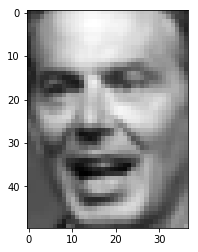

In [80]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

### insert your code here ###
pca = PCA(n_components=30)
pca.fit(X)

nn = MLPClassifier(hidden_layer_sizes=(25, 15), solver='adam', verbose=1)
X_transformed = pca.transform(X)
nn.fit(X_transformed, y)

print("Traing Accuracy: {}".format(accuracy_score(nn.predict(X_transformed), y)))


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [77]:
### your code below ###